In [5]:
!pip install kagglehub


First few rows of the dataset:
   PatientID  Age Gender  BMI     SurgeryType SurgeryDuration AnesthesiaType  \
0          1   33      M   32    Neurological         217 min          Local   
1          2   33      M   23  Cardiovascular         181 min          Local   
2          3   58      F   24      Orthopedic          79 min        General   
3          4   65      F   26      Orthopedic         210 min          Local   
4          5   65      M   28    Neurological         221 min        General   

        PreoperativeNotes              PostoperativeNotes  PainLevel  \
0  Hypertension, diabetes  Minimal pain, no complications          7   
1    Stable, no allergies  Minimal pain, no complications          7   
2    Stable, no allergies  Minimal pain, no complications          3   
3    Stable, no allergies             Pain, slow recovery          7   
4    Stable, no allergies             Pain, slow recovery          5   

           Complications  Outcome  
0                 

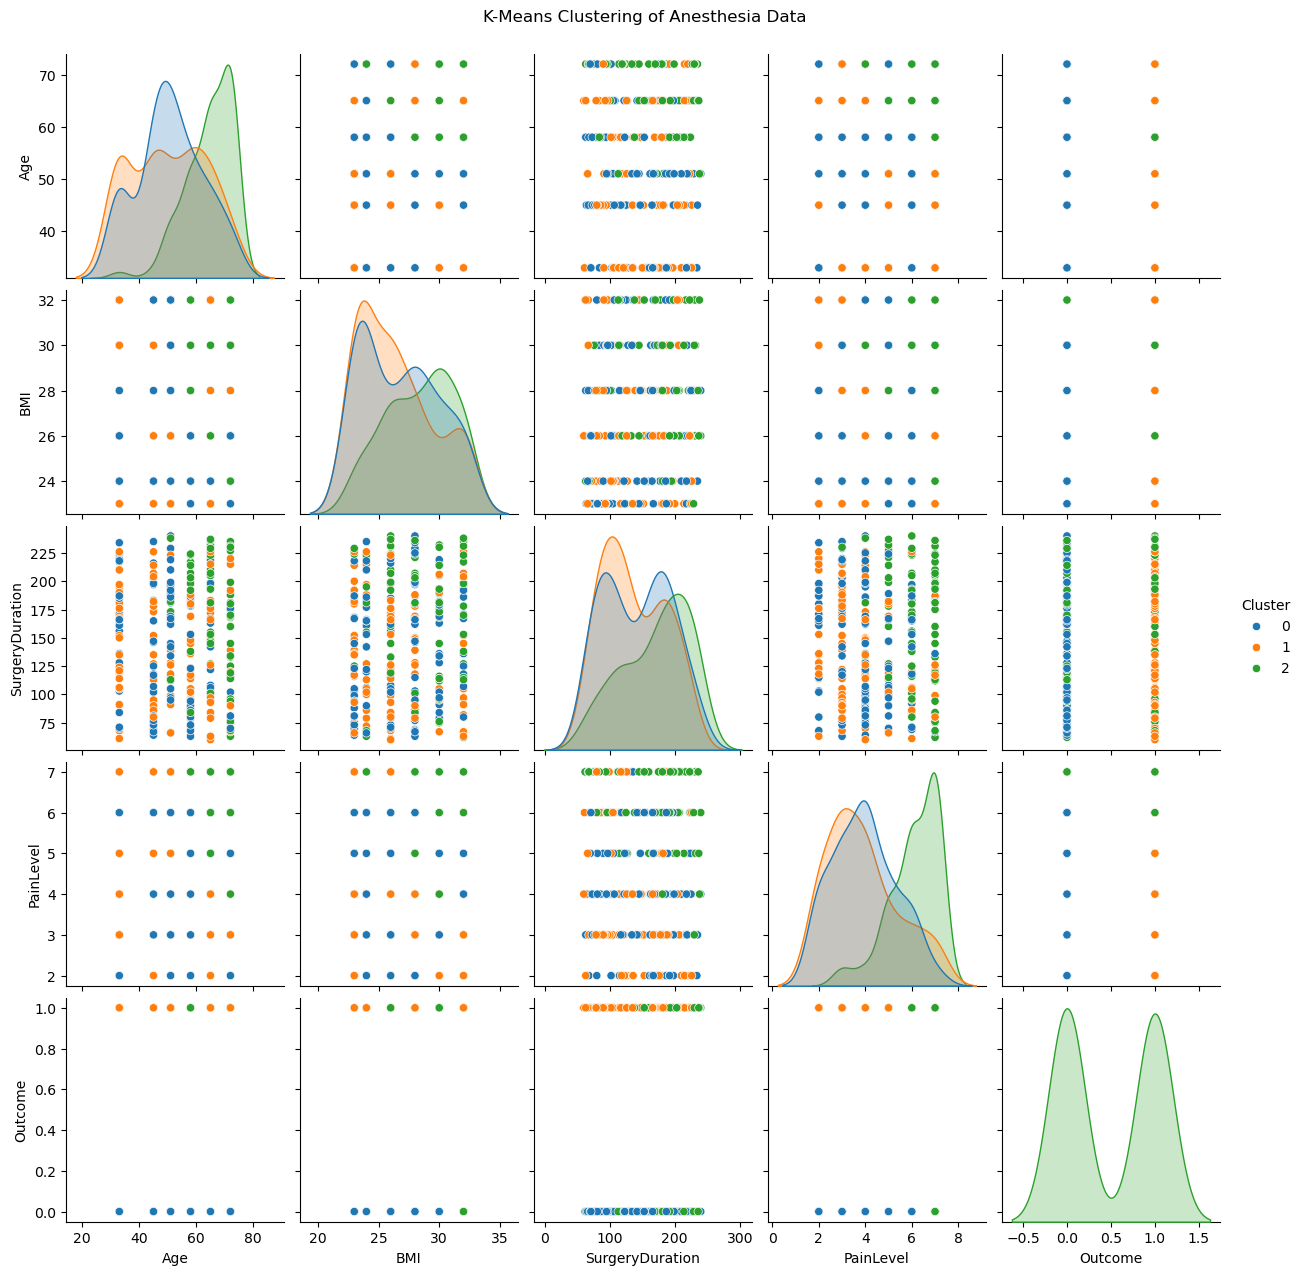


Cluster centers (standardized):
[[-0.2697149  -0.09266803 -0.10307484 -0.33555518 -1.        ]
 [-0.31849548 -0.20980571 -0.21812238 -0.37948403  1.        ]
 [ 0.7954744   0.40962276  0.43492123  0.96689824 -0.01234568]]

Cluster sizes:
Cluster
1    110
0    109
2     81
Name: count, dtype: int64

Feature averages per cluster:
               Age        BMI  SurgeryDuration  PainLevel   Outcome
Cluster                                                            
0        50.788991  26.770642       142.394495   3.944954  0.000000
1        50.163636  26.409091       136.472727   3.872727  1.000000
2        64.444444  28.320988       170.086420   6.086420  0.493827


In [4]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Download dataset to a specific directory
# target_directory = "./my_target_dir"
# path = kagglehub.dataset_download(
#     "s3programmerlead/personalized-anesthesia-management-dataset",
#     download_dir=target_directory
# )
# print("Path to dataset files:", path)

# # 2. List the files to find the dataset CSV
# print("\nFiles in the dataset directory:")
# for f in os.listdir(path):
#     print(f)

# # 3. Load the data (update filename if necessary)
# csv_file = os.path.join(path, 'Personalized_Anesthesia_Management.csv')
df = pd.read_csv("Anesthesia_Dataset.csv")
print("\nFirst few rows of the dataset:")
print(df.head())

# Convert 'SurgeryDuration' from '217 min' to integer (minutes)
df['SurgeryDuration'] = df['SurgeryDuration'].str.replace(' min', '').astype(int)

# Select only numerical features for clustering
features = ['Age', 'BMI', 'SurgeryDuration', 'PainLevel', 'Outcome']
df_selected = df[features].dropna()

# Preprocess (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df_selected, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('K-Means Clustering of Anesthesia Data', y=1.02)
plt.show()

# Analyze clusters
print("\nCluster centers (standardized):")
print(kmeans.cluster_centers_)

print("\nCluster sizes:")
print(df_selected['Cluster'].value_counts())

print("\nFeature averages per cluster:")
print(df_selected.groupby('Cluster').mean())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


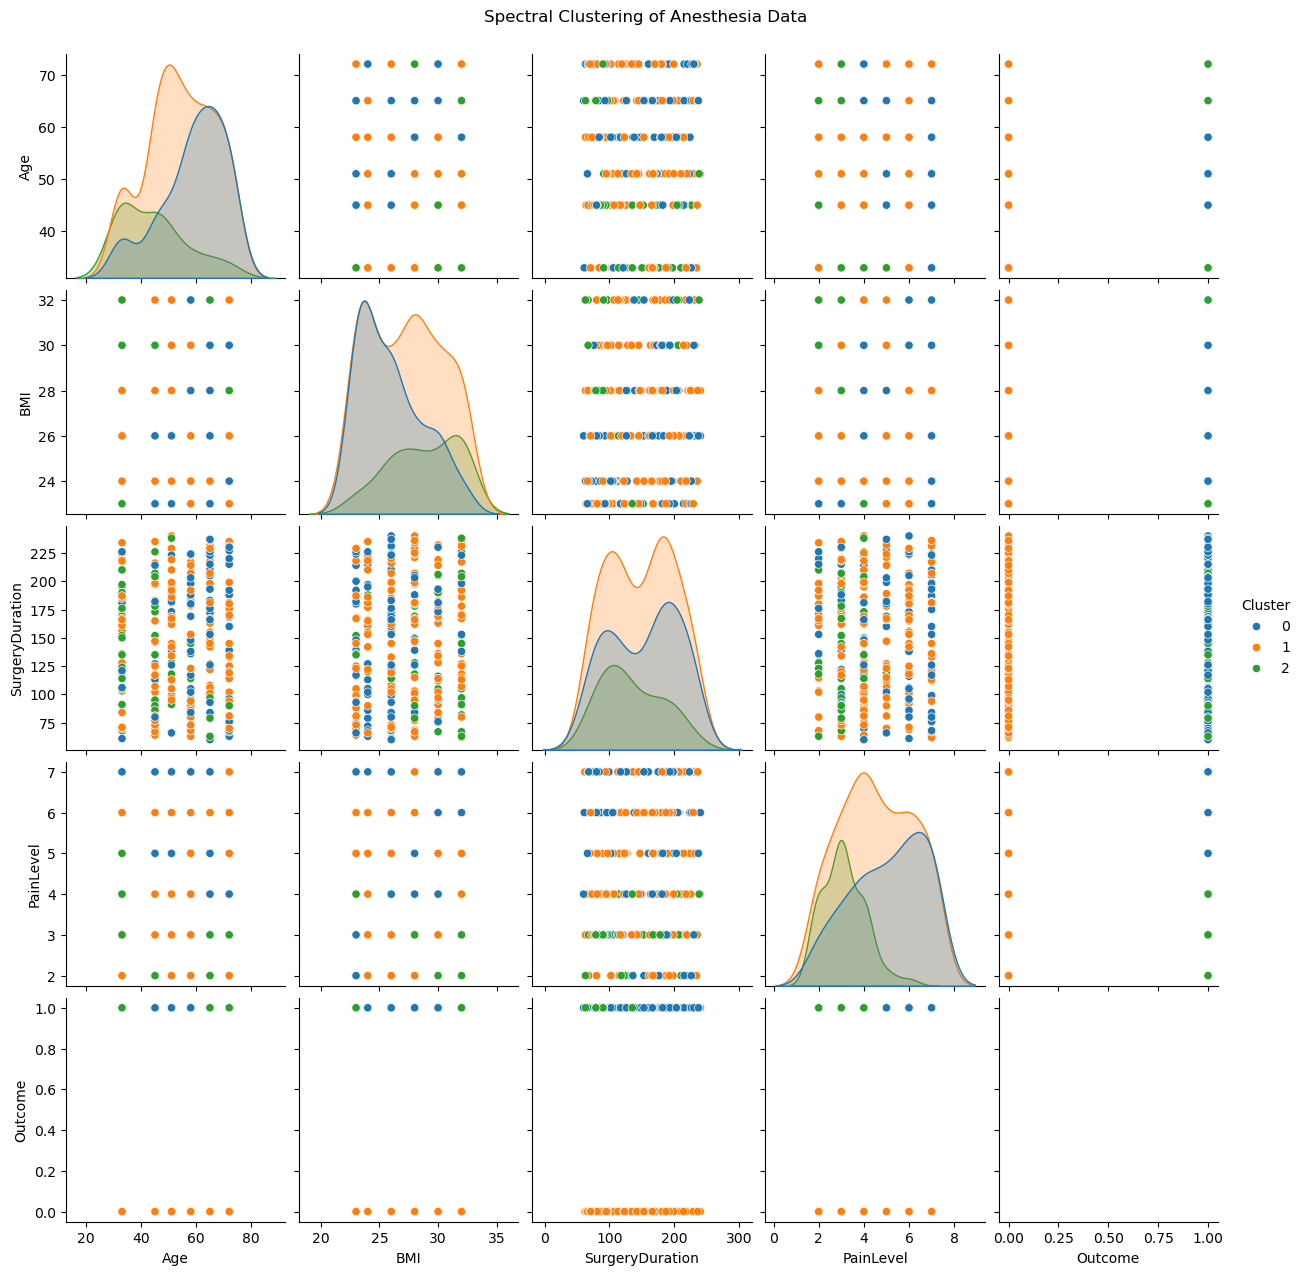


Cluster sizes:
Cluster
1    150
0    101
2     49
Name: count, dtype: int64

Feature averages per cluster:
               Age        BMI  SurgeryDuration  PainLevel  Outcome
Cluster                                                           
0        58.851485  25.960396       152.475248   5.069307      1.0
1        54.280000  27.240000       148.600000   4.560000      0.0
2        44.653061  28.755102       135.102041   3.122449      1.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Load and clean data
df = pd.read_csv("Anesthesia_Dataset.csv")
df['SurgeryDuration'] = df['SurgeryDuration'].str.replace(' min', '').astype(int)
features = ['Age', 'BMI', 'SurgeryDuration', 'PainLevel', 'Outcome']
df_selected = df[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Spectral Clustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
df_selected['Cluster'] = spectral.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df_selected, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Spectral Clustering of Anesthesia Data', y=1.02)
plt.show()

# Analyze clusters
print("\nCluster sizes:")
print(df_selected['Cluster'].value_counts())

print("\nFeature averages per cluster:")
print(df_selected.groupby('Cluster').mean())

In [ ]:
# Difference between K-means and SpectralClustering on same dataset:


1. K-means: Clusters are almost equal in size. 

VS 

Spectral Clustering finds a more imbalanced grouping, 
Perhaps this better reflects the underlying data structure.

2. K-means might be grouping based on outcome variable, not so much on patient/surgery features.
    VS
Spectral Clustering appears to find clusters with more meaningful differences in age, BMI, 
    and surgery characteristics that may be clinically relevant.







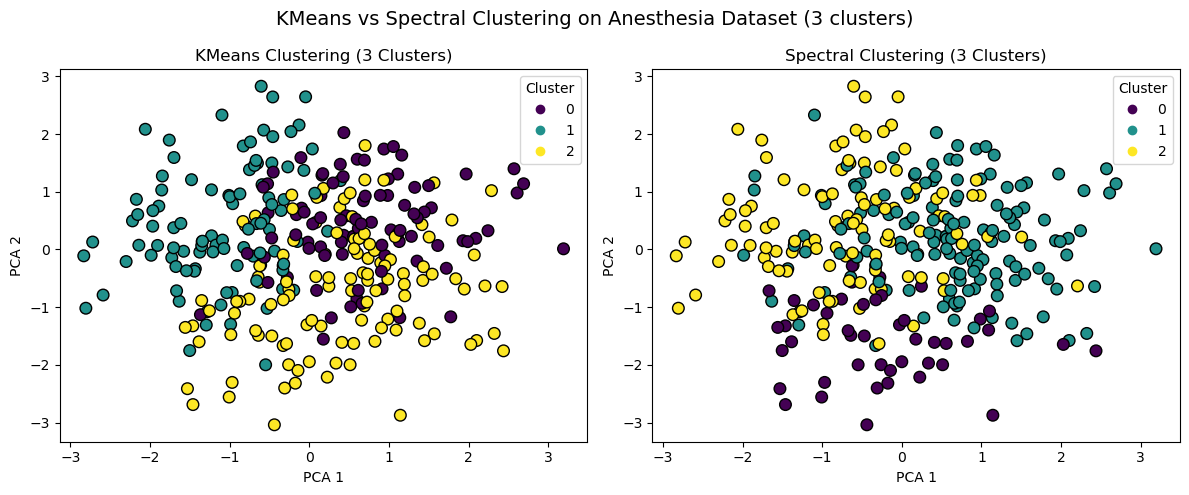

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Anesthesia_Dataset.csv')

# Clean 'SurgeryDuration' column to extract numeric minutes
df['SurgeryDuration'] = df['SurgeryDuration'].astype(str).str.extract(r'(\d+)').astype(float)

# Encode categorical columns
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_surgtype = LabelEncoder()
df['SurgeryType'] = le_surgtype.fit_transform(df['SurgeryType'])

le_anestype = LabelEncoder()
df['AnesthesiaType'] = le_anestype.fit_transform(df['AnesthesiaType'])

le_preop = LabelEncoder()
df['PreoperativeNotes'] = le_preop.fit_transform(df['PreoperativeNotes'])

le_postop = LabelEncoder()
df['PostoperativeNotes'] = le_postop.fit_transform(df['PostoperativeNotes'])

le_comp = LabelEncoder()
df['Complications'] = le_comp.fit_transform(df['Complications'])

# Drop PatientID (not useful for clustering)
X = df.drop(['PatientID'], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Number of clusters
n_clusters = 3

# Apply KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(X_scaled)

# Visualization
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
scatter_kmeans = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=70, edgecolor='k')
plt.title('KMeans Clustering (3 Clusters)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(*scatter_kmeans.legend_elements(), title="Cluster", loc="best")

plt.subplot(1,2,2)
scatter_spectral = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_spectral, cmap='viridis', s=70, edgecolor='k')
plt.title('Spectral Clustering (3 Clusters)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(*scatter_spectral.legend_elements(), title="Cluster", loc="best")

plt.suptitle('KMeans vs Spectral Clustering on Anesthesia Dataset (3 clusters)', fontsize=14)
plt.tight_layout()
plt.show()


First few rows of the dataset:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1   

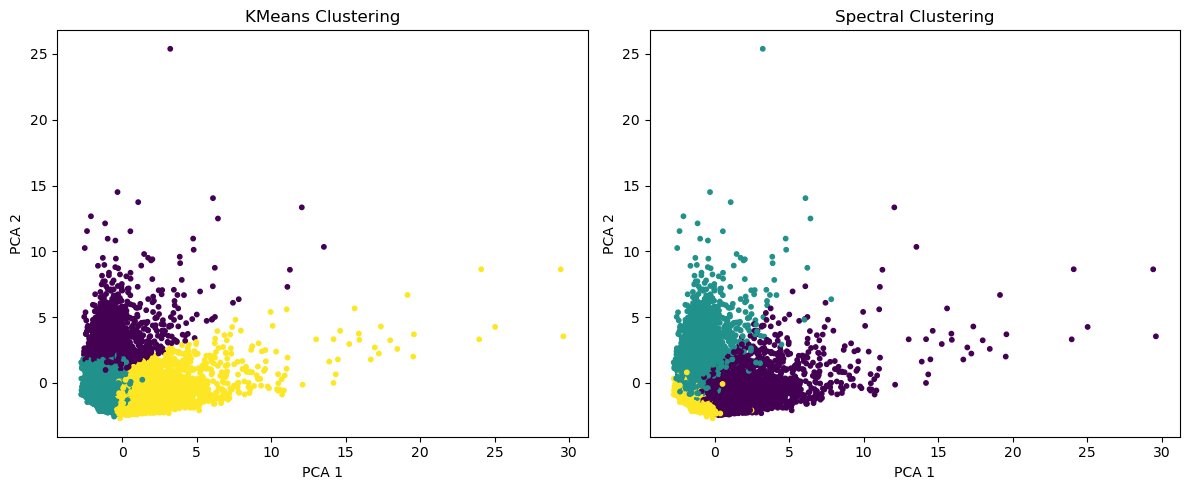

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

df = pd.read_csv('CC GENERAL.csv')

print("\nFirst few rows of the dataset:")
print(df.head())


# Drop CUST_ID and handle missing values
df = df.drop('CUST_ID', axis=1)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Run Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42, assign_labels='kmeans')
spectral_labels = spectral.fit_predict(X_scaled)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='viridis', s=10)
plt.title('Spectral Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


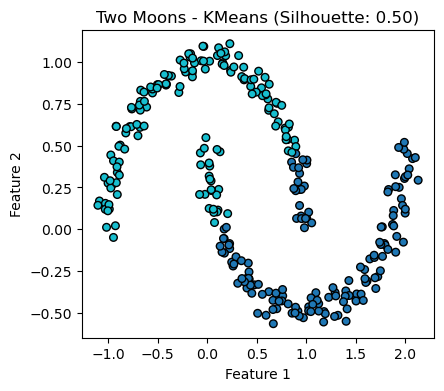

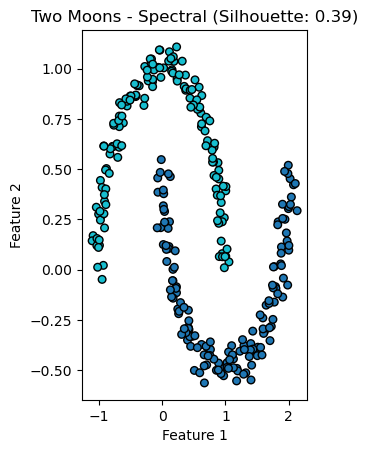

Two Moons Dataset:
KMeans Silhouette Score: 0.495
Spectral Clustering Silhouette Score: 0.386
--------------------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


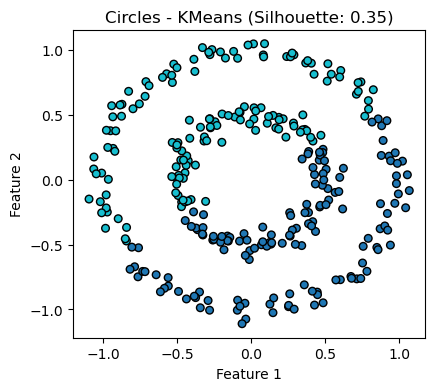

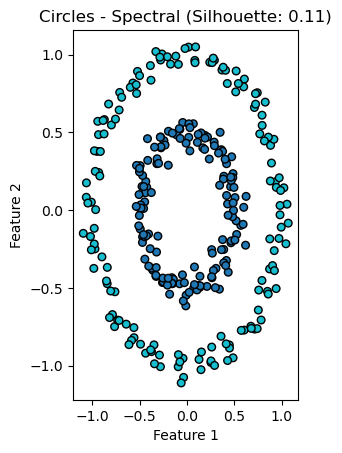

Circles Dataset:
KMeans Silhouette Score: 0.353
Spectral Clustering Silhouette Score: 0.110
--------------------------------------------------


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=30, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def cluster_and_show(X, name):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

    # Spectral clustering
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(X_scaled)
    spectral_silhouette = silhouette_score(X_scaled, spectral_labels)

    # Visualization
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plot_clusters(X, kmeans_labels, f"{name} - KMeans (Silhouette: {kmeans_silhouette:.2f})")

    plt.subplot(1, 2, 2)
    plot_clusters(X, spectral_labels, f"{name} - Spectral (Silhouette: {spectral_silhouette:.2f})")

    print(f"{name} Dataset:")
    print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")
    print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.3f}")
    print('-'*50)

# 1. Two Moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
cluster_and_show(X_moons, "Two Moons")

# 2. Circles
X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
cluster_and_show(X_circles, "Circles")

In [52]:
# Key Findings: 
1. Always visualize clustering results(images) before selecting the most appropriate algorithm for a dataset. 
Relying solely on quantitative scores like the silhouette score may not provide a complete understanding of cluster quality.

2. K-Means: Produces clusters of nearly equal size, which may not reflect the true structure of the data.
Spectral Clustering: Reveals more imbalanced and potentially meaningful groupings, 
suggesting it may better capture the underlying complexity of the dataset.

3. Spectral Clustering tends to perform better on complex datasets, 
especially when the data exhibits non-linear or intricate relationships.